In [3]:
import pandas as pd
import numpy as np
import keras

np.random.seed(2)

In [4]:
data = pd.read_csv('~/Desktop/COVID/Udemy/Udemy Machine learning case studies/Credit card fraud detection/P39-Credit-Card-Fraud/Dataset/creditcard.csv')

## Data exploration

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Pre-processing

In [6]:
from sklearn.preprocessing import StandardScaler

# create a new column for the normalized 'Amount' column, reshaped to fit the -1 to 1 range
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

# we dont need the original 'Amount' thereafter
data = data.drop(['Amount'],axis=1)

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [8]:
# We also do not need the 'Time' axis at this point
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [9]:
# We not designate our data to the X and Y data. X is every column except class, Y is class. Class(1=fraud, 0=not fraud)
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [10]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [11]:
# Implement the machine learning model by splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [12]:
X_train.shape

(199364, 29)

In [13]:
X_test.shape

(85443, 29)

In [14]:
# We need the data in the form of arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Deep neural network

In [15]:
# We import the dense layers and dropout layers to control overfitting in the future
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [17]:
# Define the model as sequential (one layer comes after the other). We define the stack of layers after that
# We define our dense layers, followed by dropout layers in the middle (to avoid overfitting), and then more dense layers
# Define as many as you deem necessary. If this model returns unsatisfactory results, we will create a new one and run it again

# Relu for all dense layers, except sigmoid for last (for binary classification)

#input_dim = all our columns
#units = nodes we deem necessary. 1 for the last layer
#0.5 probability of dropping each node

model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),
])

In [18]:
# We see that every parameter we defined matches, and we have almost 2000 parameters to train in the NN
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

## Training

In [19]:
# First call the compile method. 'adam' optimizer, 'binary_crossentropy' loss function, and we use 'accuracy' to measure our results
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#train using the fit method
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
13291/13291 [==============================] - 19s 1ms/step - loss: 0.0277 - accuracy: 0.9929
Epoch 2/5
13291/13291 [==============================] - 19s 1ms/step - loss: 0.0041 - accuracy: 0.9992
Epoch 3/5
13291/13291 [==============================] - 19s 1ms/step - loss: 0.0038 - accuracy: 0.9994
Epoch 4/5
13291/13291 [==============================] - 20s 1ms/step - loss: 0.0035 - accuracy: 0.9994
Epoch 5/5
13291/13291 [==============================] - 19s 1ms/step - loss: 0.0031 - accuracy: 0.9994


In [20]:
# input our X_test data to evaluate the model, and the y_test for comparison with the actual outcomes
score = model.evaluate(X_test, y_test)

2671/2671 [==============================] - 3s 1ms/step - loss: 0.0044 - accuracy: 0.9991


In [22]:
print(score)

# 99.91 accuracy score

[0.004425338935106993, 0.9991105198860168]


In [52]:
# Because most of our transactions are non-fraudulent, if we only use the accuracy score to evaluate the model, we may alwyas
# get a high accuracy. We need to now use the confusion matrix to actually see how well our model is as a predictor
# for true positives and true negatives. 
# False negatives represent the people who actually committed fraud but we couldn't catch
# False positives will mean users of the credit cards wil be unhappy, since they are genuine but we won't allow them to use the card


#code copied from sklearn library 

import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [53]:
#transform y_test variable intoa pd. dataframe as the required input for our cm
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

In [54]:
cnf_matrix = confusion_matrix(y_test, y_pred.round())

In [55]:
print(cnf_matrix)

[[85291     5]
 [   71    76]]


Confusion matrix, without normalization
[[85291     5]
 [   71    76]]


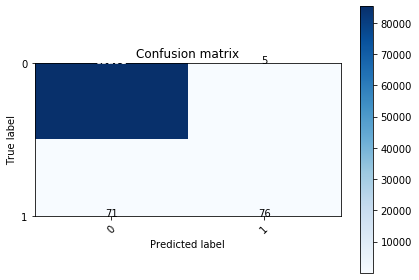

In [56]:
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [57]:
plt.show()

Confusion matrix, without normalization
[[284306      9]
 [   211    281]]


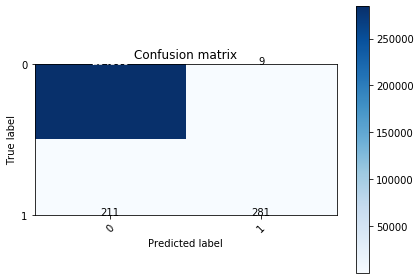

In [58]:
# 71 transactions were fraudulent. 
# plot the cm for the entire dataset now. use x, and y instead of X_train or X_test
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()



## Undersampling

In [23]:
# first locate fraud indexes in dataset
fraud_indices = np.array(data[data.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [24]:
# do the same for teh non-fraudulent transactions
normal_indices = data[data.Class == 0].index

In [25]:
# select a random sample of non-fraudulent transactions to mathc the amount of fraudulent transactions
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [26]:
# merge the 2 samples together and create an array out of them
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

984


In [27]:
# now select the corresponding rows fir those indexes
under_sample_data = data.iloc[under_sample_indices,:]

In [28]:
# split the data into X and y variables
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

In [32]:
# split the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_undersample,y_undersample, test_size=0.3)

In [33]:
# transform to np arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [34]:
#verify the model remains unchanged (refer to model summary from earlier)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
688/688 [==============================] - 1s 933us/step - loss: 0.6047 - acc: 0.9026
Epoch 2/5
688/688 [==============================] - 0s 163us/step - loss: 0.2955 - acc: 0.9070
Epoch 3/5
688/688 [==============================] - 0s 173us/step - loss: 0.2184 - acc: 0.9113
Epoch 4/5
688/688 [==============================] - 0s 178us/step - loss: 0.1792 - acc: 0.9302
Epoch 5/5
688/688 [==============================] - 0s 170us/step - loss: 0.1637 - acc: 0.9346


Confusion matrix, without normalization
[[151   0]
 [ 14 131]]


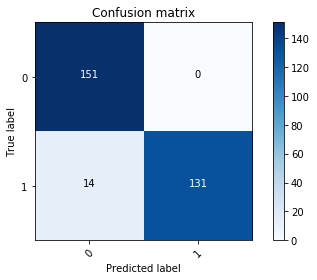

In [36]:
# cm to understand performance
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

Confusion matrix, without normalization
[[283816    499]
 [    55    437]]


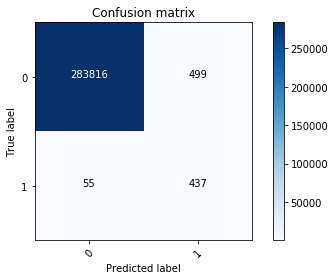

In [37]:
#now check how it works on the entire data
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

## SMOTE

In [38]:
# for oversampling
%%bash
pip install -U imbalanced-learn

  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:
      Successfully uninstalled scikit-learn-0.19.1
  Found existing installation: imbalanced-learn 0.3.3
    Uninstalling imbalanced-learn-0.3.3:
      Successfully uninstalled imbalanced-learn-0.3.3


You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
# find the x and y variables using smote
X_resample, y_resample = SMOTE().fit_sample(X,y.values.ravel())

In [41]:
# transform to pd dataframes 
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [42]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [43]:
# retrain model with the new dataset, starting by transforming everything to arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [44]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
398041/398041 [==============================] - 69s 173us/step - loss: 0.0336 - acc: 0.9886
Epoch 2/5
398041/398041 [==============================] - 63s 158us/step - loss: 0.0123 - acc: 0.9968
Epoch 3/5
398041/398041 [==============================] - 63s 159us/step - loss: 0.0101 - acc: 0.9976
Epoch 4/5
398041/398041 [==============================] - 63s 158us/step - loss: 0.0090 - acc: 0.9979
Epoch 5/5
398041/398041 [==============================] - 64s 162us/step - loss: 0.0087 - acc: 0.9981


Confusion matrix, without normalization
[[85343   335]
 [    6 84905]]


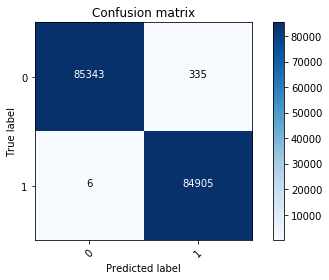

In [45]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

Confusion matrix, without normalization
[[283249   1066]
 [     0    492]]


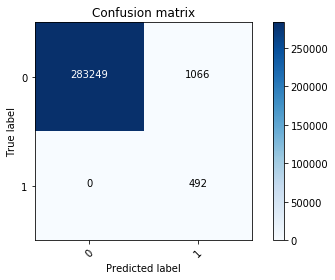

In [46]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [ ]:
#the model has way less false positives and negatives.